In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls ../data/

DeepDAO-2020-07-03.csv	ERC20Tokens_bq-20200616.csv


In [3]:
#Loading data
df = pd.read_csv('../data/DeepDAO-2020-07-03.csv')
print("data source: https://deepdao.world")

data source: https://deepdao.world


# Number of DAOs on Ethereum

In [4]:
DAOs = df.shape[0]
print(f"In our dataset, there are this many {DAOs=}")

In our dataset, there are this many DAOs=26


# Number of unique participants

In [5]:
members = df.Members.sum()
print(f"The sum of all the {members=}")
print("Although, some of these members may be duplicated, as they could reference the same wallet address in more than one DAO")

The sum of all the members=1488
Although, some of these members may be duplicated, as they could reference the same wallet address in more than one DAO


In [6]:
df.columns

Index(['Unnamed: 0', 'Platform', 'DAO Name', 'Current USD Value', 'Total In',
       'Total Out', 'Members', 'Proposals', 'Voters', 'Voter Particiption',
       'Decentralized Score'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

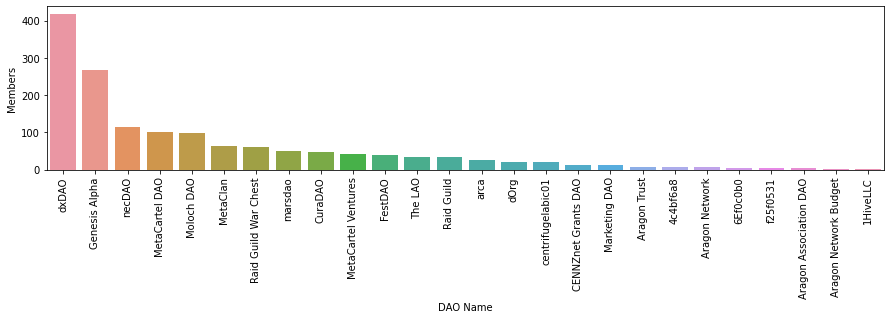

In [7]:
plt.figure(figsize=(15,3))
sns.barplot(x=df['DAO Name'], y=df['Members'])
plt.xticks(rotation=90)

# USD Assets (DAOs Income)

In [8]:
USD = int(df["Total In"].sum())
print(f"According to DeepDAO, these many assets have been input into DAOs so far: {USD=}")
print(f"Keep in mind that some of this money is just an AGGREGATE of the volume of money flowing into each DAO.")

According to DeepDAO, these many assets have been input into DAOs so far: USD=108560074
Keep in mind that some of this money is just an AGGREGATE of the volume of money flowing into each DAO.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

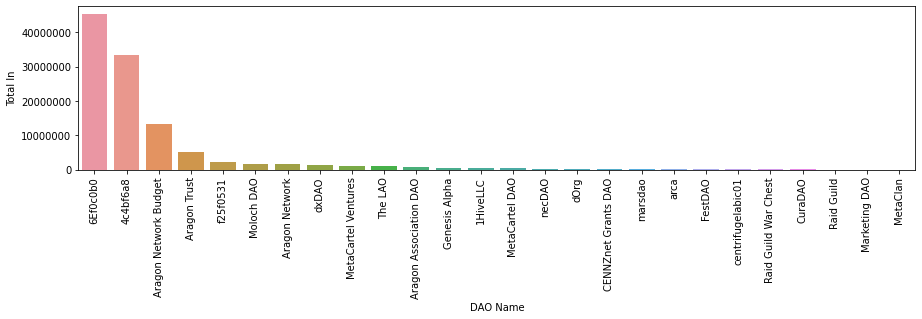

In [9]:
plt.figure(figsize=(15,3))
plt.ticklabel_format(style='plain')

top_earners = df.sort_values(by='Total In', ascending=False)
sns.barplot(x=top_earners['DAO Name'], y=top_earners['Total In'])
plt.xticks(rotation=90)

# Market Share

In [10]:
new_companies = (500000) # Each year, USA Data Estimate
mkt_share = 0.02
clients = new_companies * mkt_share
print(f"We expect to acquire a {mkt_share*100} percent of the market share.")
print(f"This rate represents an estimate of \n {clients} new clients each year\n {int(clients/12)} new clients each month")

We expect to acquire a 2.0 percent of the market share.
This rate represents an estimate of 
 10000.0 new clients each year
 833 new clients each month


# Avg Subscription Fee

In [11]:
sub_fee = 150 # USD per month

# Expected Revenue

Once we have acquired the set target of 2% market share, then the Expected yearly revenue could be calculated as follows:
`Expected Revenue = Mkt share * Avg Subscription Fee * 12 months`

In [12]:
expected_rev = clients * sub_fee * 12
print(f"Yearly {expected_rev=}")

Yearly expected_rev=18000000.0


# Improvements for a more realistic calculation:
 - Consider the time it will take to acquire all of those clients
 - What will the first 2 years look like? 
 - How many clients in the first 6 months?
 - What will be our costs?
 - How much money will be gone in transaction fees / GAS fees ?
 - How exactly will we generate this income?